# Machine Learning Component

<span style="color:red">TODO:</span> Ask David how he dealt with imaginary numbers in mean spectral energy

1 -> Import Data </n>
2 -> Calculate Features </n>
* Mean
* Variance
* Standard Deviation
* Maximum
* Minimum
* Skewness
* Kurtosis
* Mean crosings
* Mean spectral Energy
* 4 Bin Histogram (4 features)

3-> Create classifier


4 -> Make Testing feature vector

5 -> Test classifier

6 -> Create confusion matrix

Note: This script works if you run all cells in order.

In [93]:
import seglearn as sgl

from seglearn.transform import FeatureRep, SegmentX
from seglearn.pipe import SegPipe
from seglearn.datasets import load_watch

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

(1950, 100, 8)
(1950,)


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


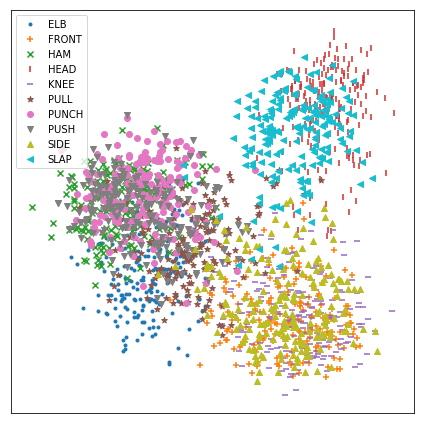

In [166]:
a = np.array(pd.read_csv('Elbowing.txt', sep="\t", header=None))
b = np.array(pd.read_csv('Frontkicking.txt', sep="\t", header=None))
c = np.array(pd.read_csv('Hamering.txt', sep="\t", header=None))
d = np.array(pd.read_csv('Headering.txt', sep="\t", header=None))
e = np.array(pd.read_csv('Kneeing.txt', sep="\t", header=None))
f = np.array(pd.read_csv('Pulling.txt', sep="\t", header=None))
g = np.array(pd.read_csv('Punching.txt', sep="\t", header=None))
h = np.array(pd.read_csv('Pushing.txt', sep="\t", header=None))
i = np.array(pd.read_csv('Sidekicking.txt', sep="\t", header=None))
j = np.array(pd.read_csv('Slapping.txt', sep="\t", header=None))

X_me = np.array([a,b,c,d,e,f,g,h,i,j])
y_me = np.array([0,1,2,3,4,5,6,7,8,9])
data_me = ['ELB','FRONT', 'HAM', 'HEAD', 'KNEE', 'PULL', 'PUNCH', 'PUSH', 'SIDE', 'SLAP']

segmenter = SegmentX(100,0.5)
X, y, _ = segmenter.fit_transform(X_me, y_me)

print(np.shape(X))
print(np.shape(y))

def plot_embedding(emb, y, y_labels):
    # plot a 2D feature map embedding
    x_min, x_max = np.min(emb, 0), np.max(emb, 0)
    emb = (emb - x_min) / (x_max - x_min)

    NC = len(y_labels)
    markers = ['.','+','x','|','_','*','o','v','^','<']

    fig = plt.figure()
    fig.set_size_inches(6,6)

    for c in range(NC):
        i = y == c
        plt.scatter(emb[i, 0], emb[i, 1], marker=markers[c], label = y_labels[c])

    plt.xticks([]), plt.yticks([])
    plt.legend()
    plt.tight_layout()

# create a pipeline for LDA transformation of the feature representation
est = Pipeline([ ('ftr', sgl.FeatureRep()),
    ('lda', LinearDiscriminantAnalysis(n_components=2))])

pipe = sgl.SegPipe(est)
X2, y2 = pipe.fit_transform(X, y)
plot_embedding(X2, y2.astype(int), data_me)
plt.show()

In [167]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    ''' plots confusion matrix '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# # load the data
# data = load_watch()
# X = data['X']
# y = data['y']

# create a feature representation pipeline
est = Pipeline([('features', FeatureRep()),
                ('scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])
pipe = SegPipe(est)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#print(np.shape(X_train))
#print(np.shape(X_test))
#print(np.shape(y_train))
#print(np.shape(y_test))
pipe.fit(X_train,y_train)
score = pipe.score(X_test, y_test)
print("Accuracy score: ", score)

Accuracy score:  0.690573770492


F1 score:  0.688426259384


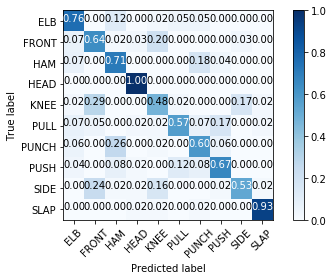

In [168]:
y_true, y_pred = pipe.predict(X_test, y_test)
#print(y_true)#[:500])
#print(y_pred)#[:500])
# use any of the sklearn scorers
f1_macro = f1_score(y_true, y_pred, average='macro')
print("F1 score: ", f1_macro)

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, data_me)
plt.show()

## Calculate Features

In [1]:
import math
import scipy as sp
from scipy.stats import kurtosis, skew
import sklearn
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Elbowing.txt', sep="\t", header=None)
#data.columns = ["R_BI", "R_TRI", "L_BI", "L_TRI", "R_THI", "R_HAM", "L_THI", "L_HAM"]
elbow = data[0:700]

data = pd.read_csv('Frontkicking.txt', sep="\t", header=None)
frontKick = data[0:700]

data = pd.read_csv('Hamering.txt', sep="\t", header=None)
hamering = data[0:700]

data = pd.read_csv('Headering.txt', sep="\t", header=None)
headering = data[0:700]

frames = [elbow, frontKick, hamering, headering]
#combined = pd.concat(frames)
#np.shape(combined)

In [3]:
def appendEnergyVector(dataFrame):
    #take in the dataFrame, set new columns as a^2 + b^2 for each pair of 2. 
    energyCols = [8, 9, 10, 11]
    i = 0
    for col in energyCols:
        dataFrame[col] = np.square(dataFrame[i])+np.square(dataFrame[i+1])
        i = i+2
    return dataFrame

elbow = appendEnergyVector(elbow)
frontKick = appendEnergyVector(frontKick)
hamering = appendEnergyVector(hamering)
headering = appendEnergyVector(headering)

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#Mean crossings
def meanCrossing(frame):
    centeredFrame = frame - np.mean(frame)
    return ((centeredFrame[0][:-1].values * centeredFrame[0][1:].values) < 0).sum()

In [5]:
#4 bin histogram: It's actually 4 features. The bins are range/4. Check frequency of each bin for each feature. 
def fourBin(frame):
    allBins = np.histogram(frame[0],bins=4)[0][:]
    for i in range(1,12):
        allBins = np.append(allBins, np.histogram(frame[i],bins=4)[0][:])
    return allBins

In [6]:
featMean = np.empty([4,12])
featVar = np.empty([4,12])
featStd = np.empty([4,12])
featMin = np.empty([4,12])
featMax = np.empty([4,12])
featSkew = np.empty([4,12])
featKurtosis = np.empty([4,12])
featMeanCrossing = np.empty([4,12])
featMeanSpectralEnergy = np.empty([4,12], dtype=complex)
featFourBin = np.empty([4,48])

i=0
for frame in frames:
    featMean[i][:] = np.mean(frame).values.reshape([1,12])
    featVar[i][:] = np.var(frame).values.reshape([1,12])
    featStd[i][:] = np.std(frame).values.reshape([1,12])
    featMin[i][:] = np.min(frame).values.reshape([1,12])
    featMax[i][:] = np.max(frame).values.reshape([1,12])
    featSkew[i][:] = skew(frame)
    featKurtosis[i][:] = kurtosis(frame)
    featMeanCrossing[i][:] = meanCrossing(frame)
    featMeanSpectralEnergy[i][:] = np.mean(np.square(np.fft.fft(frame)),0)
    featFourBin[i][:] = fourBin(frame)
    i = i+1

allFeats = featMean
features = [featVar, featStd, featMin, featMax, featSkew, featKurtosis, featMeanCrossing, featMeanSpectralEnergy, featFourBin]
for feature in features:
    allFeats = np.append(allFeats, feature, axis=1)

print(np.shape(allFeats)) #4 samples by (12 channels by 13 features) = 4 x 156
        

(4, 156)


## Train classifiers 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [8]:
#Random Forest
#Create and train classifier
y = np.reshape([1,2,3,4],[4,1])
#Train classifier. 
clfRf = RandomForestClassifier(n_jobs=2,random_state=0) #n_jobs to run in parallel. 
#Random_state is the seed used for the random number generator. 
clfRf.fit(allFeats,y)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
#Support Vector Classifier
clfSvc = svm.SVC(kernel='linear')
clfSvc.fit(allFeats,y)


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Make Testing Data

In [10]:
indexStart = 700
indexStop = 1400

data = pd.read_csv('Elbowing.txt', sep="\t", header=None)
#data.columns = ["R_BI", "R_TRI", "L_BI", "L_TRI", "R_THI", "R_HAM", "L_THI", "L_HAM"]
elbow = data[indexStart:indexStop]

data = pd.read_csv('Frontkicking.txt', sep="\t", header=None)
frontKick = data[indexStart:indexStop]

data = pd.read_csv('Hamering.txt', sep="\t", header=None)
hamering = data[indexStart:indexStop]

data = pd.read_csv('Headering.txt', sep="\t", header=None)
headering = data[indexStart:indexStop]

frames = [elbow, frontKick, hamering, headering]

In [11]:
def appendEnergyVector(dataFrame):
    #take in the dataFrame, set new columns as a^2 + b^2 for each pair of 2. 
    energyCols = [8, 9, 10, 11]
    i = 0
    for col in energyCols:
        dataFrame[col] = np.square(dataFrame[i])+np.square(dataFrame[i+1])
        i = i+2
    return dataFrame

elbow = appendEnergyVector(elbow)
frontKick = appendEnergyVector(frontKick)
hamering = appendEnergyVector(hamering)
headering = appendEnergyVector(headering)

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#Build feature vector for testing data


In [13]:
featMean = np.empty([4,12])
featVar = np.empty([4,12])
featStd = np.empty([4,12])
featMin = np.empty([4,12])
featMax = np.empty([4,12])
featSkew = np.empty([4,12])
featKurtosis = np.empty([4,12])
featMeanCrossing = np.empty([4,12])
featMeanSpectralEnergy = np.empty([4,12], dtype=complex)
featFourBin = np.empty([4,48])

i=0
for frame in frames:
    featMean[i][:] = np.mean(frame).values.reshape([1,12])
    featVar[i][:] = np.var(frame).values.reshape([1,12])
    featStd[i][:] = np.std(frame).values.reshape([1,12])
    featMin[i][:] = np.min(frame).values.reshape([1,12])
    featMax[i][:] = np.max(frame).values.reshape([1,12])
    featSkew[i][:] = skew(frame)
    featKurtosis[i][:] = kurtosis(frame)
    featMeanCrossing[i][:] = meanCrossing(frame)
    featMeanSpectralEnergy[i][:] = np.mean(np.square(np.fft.fft(frame)),0)
    featFourBin[i][:] = fourBin(frame)
    i = i+1

allFeats = featMean
features = [featVar, featStd, featMin, featMax, featSkew, featKurtosis, featMeanCrossing, featMeanSpectralEnergy, featFourBin]
for feature in features:
    allFeats = np.append(allFeats, feature, axis=1)

print(np.shape(allFeats)) #4 samples by (12 channels by 13 features) = 4 x 156

(4, 156)


## Test Classifier

### Random Forest

In [14]:
clfRf.predict(allFeats)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


array([1, 2, 3, 4])

In [15]:
clfRf.predict_proba(allFeats)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


array([[ 0.3,  0.3,  0.3,  0.1],
       [ 0.3,  0.4,  0. ,  0.3],
       [ 0.2,  0.2,  0.3,  0.3],
       [ 0.1,  0.4,  0. ,  0.5]])

In [16]:
y_test = [[1],[2],[3],[4]]
clfRf.score(allFeats, y_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


1.0

In [20]:
featureDf = pd.DataFrame(allFeats)
featureDf[0:155].head()
importances = list(zip(featureDf[0:155], clfRf.feature_importances_))
importances.sort(key=lambda x: x[1], reverse=True)
importances[0:20]

[(12, 0.10000000000000001),
 (75, 0.10000000000000001),
 (76, 0.10000000000000001),
 (107, 0.10000000000000001),
 (4, 0.059999999999999998),
 (21, 0.059999999999999998),
 (79, 0.059999999999999998),
 (123, 0.059999999999999998),
 (153, 0.059999999999999998),
 (2, 0.040000000000000001),
 (45, 0.040000000000000001),
 (85, 0.040000000000000001),
 (87, 0.040000000000000001),
 (104, 0.040000000000000001),
 (27, 0.033333333333333333),
 (122, 0.033333333333333333),
 (151, 0.033333333333333333),
 (0, 0.0),
 (1, 0.0),
 (3, 0.0)]

In [22]:
from sklearn_porter import Porter
porter = Porter(clfRf, language='java')
output = porter.export(embed_data=True)
print(output)

class RandomForestClassifier {
    public static int predict_0(double[] features) {
        int[] classes = new int[4];
        
        if (features[79] <= 0.0102784633636) {
            classes[0] = 2; 
            classes[1] = 0; 
            classes[2] = 0; 
            classes[3] = 0; 
        } else {
            if (features[2] <= -56.6107139587) {
                classes[0] = 0; 
                classes[1] = 0; 
                classes[2] = 1; 
                classes[3] = 0; 
            } else {
                classes[0] = 0; 
                classes[1] = 0; 
                classes[2] = 0; 
                classes[3] = 1; 
            }
        }
        int class_idx = 0;
        int class_val = classes[0];
        for (int i = 1; i < 4; i++) {
            if (classes[i] > class_val) {
                class_idx = i;
                class_val = classes[i];
            }
        }
        return class_idx;
    }
    
    public static int predict_1(double[] features) {
     

### Support Vector Classifier

In [ ]:
preds = clfSvc.predict(allFeats)
preds

In [19]:
y_test = [[1],[2],[3],[4]]
clfSvc.score(allFeats, y_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.75

In [23]:
from sklearn_porter import Porter
porter = Porter(clfSvc, language='java')
output = porter.export(embed_data=True)
print(output)

class SVC {

    private enum Kernel { LINEAR, POLY, RBF, SIGMOID }

    private int nClasses;
    private int nRows;
    private int[] classes;
    private double[][] vectors;
    private double[][] coefficients;
    private double[] intercepts;
    private int[] weights;
    private Kernel kernel;
    private double gamma;
    private double coef0;
    private double degree;

    public SVC (int nClasses, int nRows, double[][] vectors, double[][] coefficients, double[] intercepts, int[] weights, String kernel, double gamma, double coef0, double degree) {
        this.nClasses = nClasses;
        this.classes = new int[nClasses];
        for (int i = 0; i < nClasses; i++) {
            this.classes[i] = i;
        }
        this.nRows = nRows;

        this.vectors = vectors;
        this.coefficients = coefficients;
        this.intercepts = intercepts;
        this.weights = weights;

        this.kernel = Kernel.valueOf(kernel.toUpperCase());
        this.gamma = gamma;
        thi

# Depreciated

In [ ]:
#np.var(elbow)

In [ ]:
#np.std(elbow)

In [ ]:
#np.min(elbow)

In [ ]:
#np.max(elbow)

In [ ]:
#skew(elbow)

In [ ]:
#kurtosis(elbow)

In [ ]:
#Mean crossings
#centeredElbow = elbow - means
#((centeredElbow[0][:-1].values * centeredElbow[0][1:].values) < 0).sum()


In [ ]:
#Mean spectral energy
#fourier = np.fft.fft(elbow)
#uSpectralEnergy = np.mean(np.square(fourier),0)
#print(uSpectralEnergy)

In [ ]:
#Test classifier by passing in 700 new values from something, getting the features, then predicing. 
